# 6.5 Unsupervised Machine Learning: Clustering

# This script contains the following:
1. Importing libraries and data and renaming columns
2. The elbow technique
3. k-means clustering

# Importing libraries and data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# This option ensures the graphs are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Define the CSV file path
path = r'C:\Users\juank\Documents\World Hapinnes'

In [4]:
# Import file CSV
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', '2019_cleaned.csv'), index_col=False)

In [5]:
df.shape

(156, 11)

In [6]:
df.head()

,Unnamed: 0,Overall rank,Country,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption
0,0,1,Finland,Western Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,1,2,Denmark,Western Europe,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2,3,Norway,Western Europe,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,3,4,Iceland,Western Europe,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,4,5,Netherlands,Western Europe,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [7]:
# select numerical columns
numeric_columns = [
    'Score',
    'GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom ',
    'Generosity',
    'Perceptions of corruption']

In [8]:
numeric_df = df[numeric_columns]

In [9]:
# check selected numerical columns
numeric_df.columns

Index(['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom ', 'Generosity', 'Perceptions of corruption'],
      dtype='object')

# 2. The elbow technique

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(numeric_df).score(numeric_df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

C:\Users\juank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\juank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\juank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\juank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [12]:
score

[-245.58699341025638,
 -90.95573347945206,
 -55.324691123433695,
 -40.32133080678963,
 -29.874455852139043,
 -26.21791486389689,
 -24.204566381224,
 -22.897121260912417,
 -21.128703999539532]

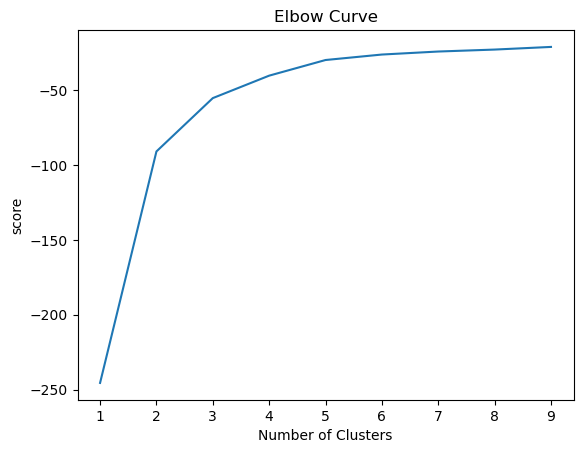

In [13]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('score')
pl.title('Elbow Curve')
pl.show()

# the elbow point appears to be around 𝑘=3 This is the point where the slope of the curve becomes less steep

# # 3. k-means clustering

In [14]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [15]:
# Fit the k-means object to the data.
kmeans.fit(numeric_df)

C:\Users\juank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\juank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [16]:
numeric_df['clusters'] = kmeans.fit_predict(numeric_df)

C:\Users\juank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\juank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\juank\AppData\Local\Temp\ipykernel_11972\3729711241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['clusters'] = kmeans.fit_predict(numeric_df)


In [17]:
numeric_df.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption,clusters
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393,1
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410,1
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341,1
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118,1
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298,1


In [18]:
numeric_df['clusters'].value_counts()

clusters
0    67
2    59
1    30
Name: count, dtype: int64

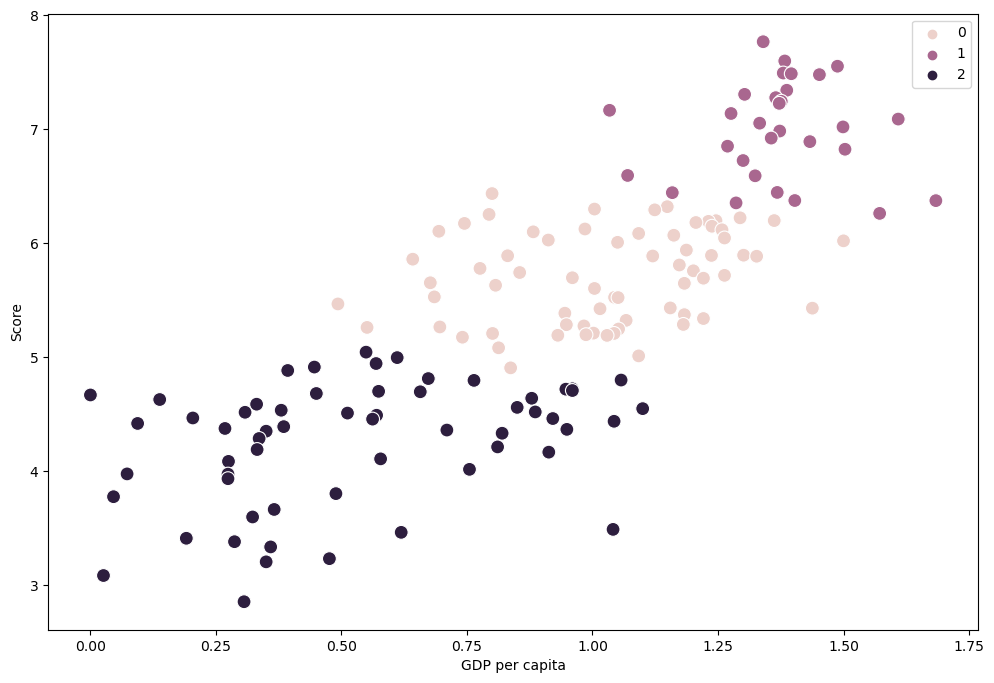

In [19]:
# Plot the clusters for the "GDP per capita" and "Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numeric_df['GDP per capita'], y=numeric_df['Score'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP per capita') # Label x-axis.
plt.ylabel('Score') # Label y-axis.
plt.show()

# Cluster 0 represents developing countries with intermediate GDP per capita and happiness, indicating a decent standard of living but with challenges to improving well-being. Cluster 1 groups developed economies with high standards of living and happiness, benefiting from better services and infrastructure. Cluster 2 includes countries with the lowest values ​​in GDP per capita and happiness, facing serious difficulties in access to basic services, education and health.

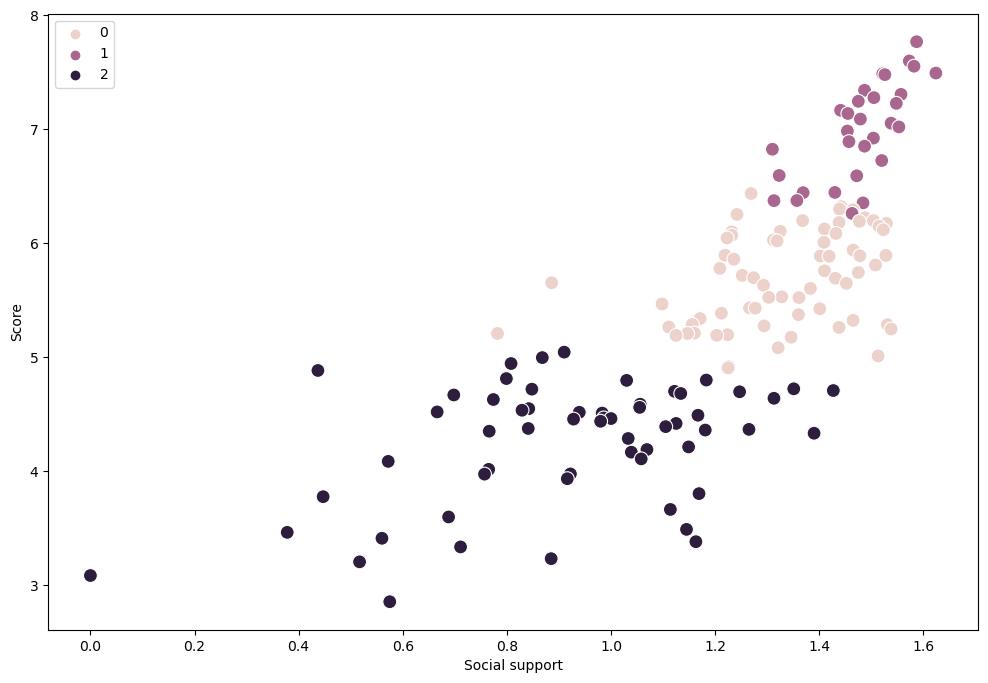

In [20]:
# Plot the clusters for the "Social support" and "Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numeric_df['Social support'], y=numeric_df['Score'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Social support') 
plt.ylabel('Score') 
plt.show()

# The graph shows a strong positive relationship between social support and happiness scores among countries. Countries in Cluster 0  have intermediate levels of social support and happiness. Countries in Cluster 1  have higher levels of both social support and happiness, while countries in Cluster 2  exhibit the lowest levels in both variables.

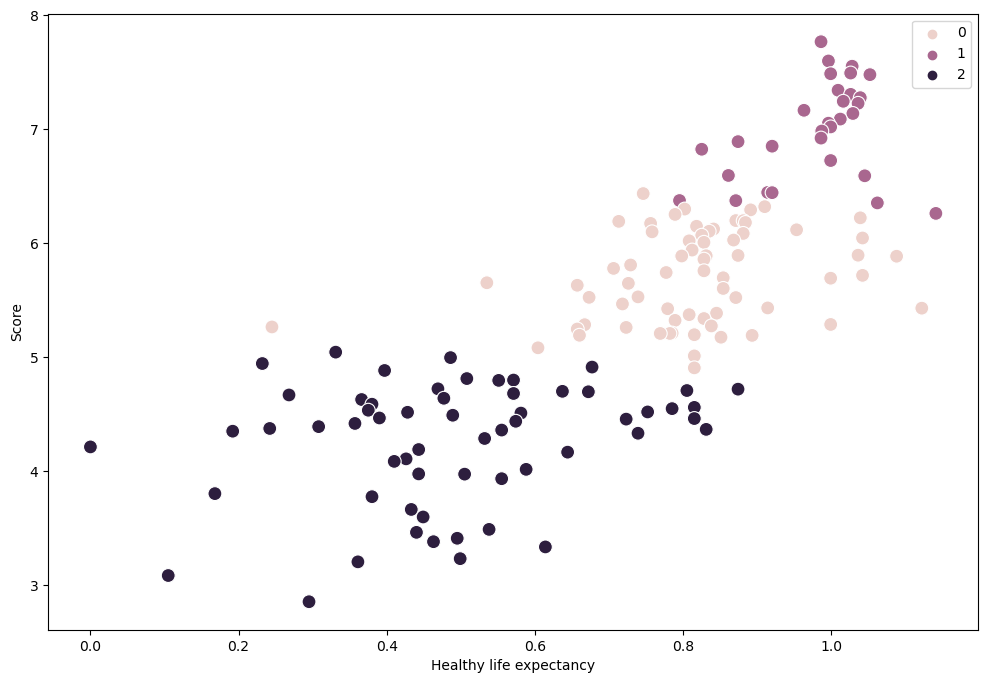

In [21]:
# Plot the clusters for the "Healthy life expectancy" and "Score" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numeric_df['Healthy life expectancy'], y=numeric_df['Score'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Healthy life expectancy') # Label x-axis.
plt.ylabel('Score') # Label y-axis.
plt.show()

# The graph shows a positive relationship between healthy life expectancy and happiness scores. Countries in Cluster 0 have intermediate values, indicating moderate development. Cluster 1 includes more advanced economies with higher life expectancy and happiness. Cluster 2 represents countries with the lowest values in both, facing significant health and wellbeing challenges.

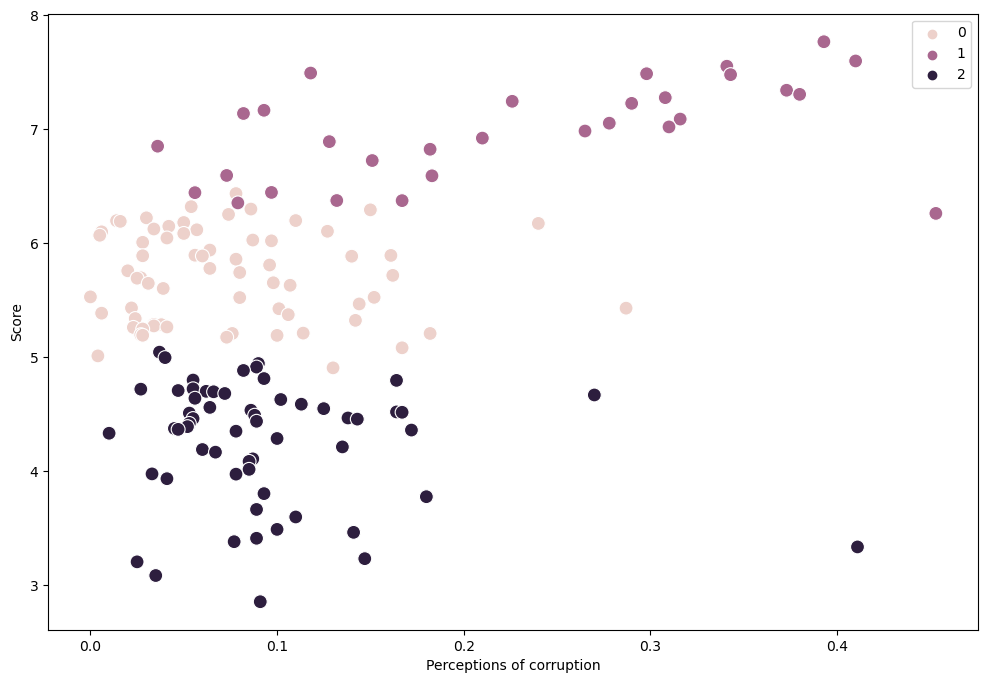

In [22]:
# Plot the clusters for the "Perceptions of corruption" and "Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numeric_df['Perceptions of corruption'], y=numeric_df['Score'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Perceptions of corruption') # Label x-axis.
plt.ylabel('Score') # Label y-axis.
plt.show()

# There is a slight inverse relationship between the perception of corruption and happiness scores among countries. Countries in Cluster 0  and Cluster 1 generally have high happiness scores but differ in their levels of perceived corruption. In contrast, countries in Cluster 2 exhibit lower happiness scores and varying levels of perceived corruption.

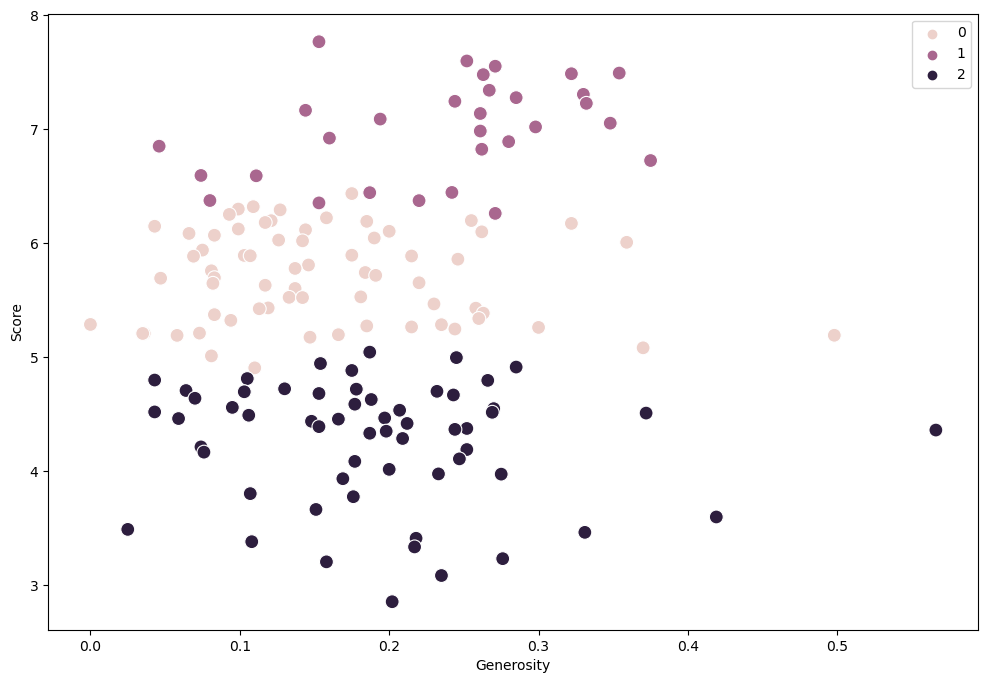

In [23]:
# Plot the clusters for the "Generosity" and "Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numeric_df['Generosity'], y=numeric_df['Score'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Generosity') 
plt.ylabel('Score') 
plt.show()

# There is no clear relationship between generosity and happiness scores. The clusters are more dispersed along the generosity axis. Countries in Cluster 0  and Cluster 1 have relatively high happiness scores with varying levels of generosity. Cluster 2 tends to have lower happiness scores and also shows variability in generosity.

In [24]:
numeric_df.loc[numeric_df['clusters'] == 2, 'cluster'] = 'dark purple'
numeric_df.loc[numeric_df['clusters'] == 1, 'cluster'] = 'purple'
numeric_df.loc[numeric_df['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\juank\AppData\Local\Temp\ipykernel_11972\2364569478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df.loc[numeric_df['clusters'] == 2, 'cluster'] = 'dark purple'


In [26]:
numeric_df.groupby('cluster').agg({'Score':['mean', 'median'], 
                         'GDP per capita':['mean', 'median'], 
                         'Social support':['mean', 'median'],
                           'Healthy life expectancy':['mean', 'median'],
                           'Freedom ':['mean', 'median'],
                           'Generosity':['mean', 'median'],
                          'Perceptions of corruption':['mean', 'median']})

Score         GDP per capita         Social support          \
                 mean  median           mean  median           mean  median   
cluster                                                                       
dark purple  4.258322  4.4180       0.531695  0.4890       0.930695  0.9800   
pink         5.706910  5.7180       1.025970  1.0440       1.332373  1.3460   
purple       6.996767  7.0375       1.369767  1.3725       1.479833  1.4855   

            Healthy life expectancy         Freedom          Generosity  \
                               mean median      mean  median       mean   
cluster                                                                   
dark purple                0.491678  0.486  0.320169  0.3440   0.191136   
pink                       0.816672  0.818  0.403836  0.4350   0.157000   
purple                     0.980400  0.999  0.509800  0.5435   0.234667   

                   Perceptions of corruption         
            median                      mean median  
cluster                                              
dark purple  0.187                  0.093356  0.085  
pink         0.137                  0.074254  0.060  
purple       0.261                  0.225700  0.218

# In simple terms, the results show that countries in Cluster 2 (dark purple) have the lowest levels of happiness, GDP per capita, social support, healthy life expectancy, freedom, and generosity, and a high perception of corruption. Countries in Cluster 1 (pink) have moderate levels in these variables. Countries in Cluster 0 (purple) have the highest levels of happiness and other variables, indicating better economic and social conditions, and less corruption. 

# This suggests that a nation's well-being is strongly related to its economy, social support, health, and governance and They would also aid in creating predictive models to forecast the impact of changes in these factors on future happiness levels.